# Fuel Prices Analysis (United Kingdom Data)

## Research Goals

- Identify how fuel prices fluctuate over time and determine key patterns.
- Analyze the impact of external factors such as supply chain disruptions, oil prices, VAT, inflation, and geopolitical events on fuel prices.
- Compare fuel price trends across different time periods to understand long-term changes.
- Use machine learning models to predict future fuel price movements based on historical data.
- Store and process data efficiently using **AWS S3** and **Snowflake**, ensuring scalability and reliability.
- Present findings through interactive **Power BI** dashboards and **Plotly Dash** visualizations for clear and actionable insights.
- Implement a **deployment mode** for predictive models, allowing real-time or batch forecasting of fuel prices.

## 8. Deep Analysis: Next Steps

### **Objective**
In this phase, we will conduct an in-depth analysis of fuel prices, oil prices, currency fluctuations, and inflation trends. The goal is to uncover correlations, patterns, and external factors influencing these variables.

### **Steps**
1. **Exploratory Data Analysis (EDA)**  
   - Perform detailed statistical summaries.
   - Identify trends, seasonal effects, and anomalies.
   - Visualize relationships between key variables.

2. **Correlation & Dependency Analysis**  
   - Compute correlation matrices between fuel prices, oil prices, currency exchange rates, and inflation.
   - Identify dependencies between variables and their strength.
   - Check for lagged correlations (e.g., how oil price changes affect fuel prices with a delay).

3. **Impact of External Events**  
   - Identify key economic and geopolitical events (e.g., Brexit, COVID-19, supply chain disruptions).
   - Analyze their effects on fuel prices and related variables.
   - Compare periods before and after major events.

4. **Anomaly Detection**  
   - Identify unexpected spikes or drops in fuel prices.
   - Check whether anomalies coincide with external events or are outliers with unknown causes.
   - Classify anomalies as short-term or long-term deviations.

5. **Deep Comparative Analysis**  
   - Compare historical trends in different periods (e.g., pre-pandemic vs. post-pandemic).
   - Analyze the impact of policy changes (e.g., tax regulations, fuel subsidies).
   - Evaluate price sensitivity to external factors.

6. **Final Interpretation & Summary**  
   - Summarize findings with key takeaways.
   - Highlight any unexpected patterns or insights for further research.
   - Define the most critical factors influencing fuel prices.

### **Outcome**
This analysis will guide next steps, ensuring a deeper understanding of price fluctuations and their driving factors. The insights from this phase will serve as a foundation for advanced modeling and hypothesis testing in future studies.

#### 8.1 Cleaned dataset uploading

In [2]:
import pandas as pd

df = pd.read_csv("final_cleaned_data.csv")

print(df.head())

         DATE  ULSP_PRICE  ULSD_PRICE  ULSP_DUTY  ULSD_DUTY  PRICE_OIL  \
0  2019-01-01      1.2027      1.3033     0.5795     0.5795      59.41   
1  2019-01-02      1.2027      1.3033     0.5795     0.5795      59.41   
2  2019-01-03      1.2027      1.3033     0.5795     0.5795      59.41   
3  2019-01-04      1.2027      1.3033     0.5795     0.5795      59.41   
4  2019-01-05      1.2027      1.3033     0.5795     0.5795      59.41   

   PRICE_CURRENCY  INFLATION_RATE  
0          1.2751             1.8  
1          1.2607             1.8  
2          1.2631             1.8  
3          1.2726             1.8  
4          1.2726             1.8  


---

#### 8.2 DataSet summary

In [3]:
df.dtypes

DATE               object
ULSP_PRICE        float64
ULSD_PRICE        float64
ULSP_DUTY         float64
ULSD_DUTY         float64
PRICE_OIL         float64
PRICE_CURRENCY    float64
INFLATION_RATE    float64
dtype: object

In [4]:
# Convert DATE column to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Verify the change
print(df.dtypes)

DATE              datetime64[ns]
ULSP_PRICE               float64
ULSD_PRICE               float64
ULSP_DUTY                float64
ULSD_DUTY                float64
PRICE_OIL                float64
PRICE_CURRENCY           float64
INFLATION_RATE           float64
dtype: object


In [5]:
df.info

<bound method DataFrame.info of            DATE  ULSP_PRICE  ULSD_PRICE  ULSP_DUTY  ULSD_DUTY  PRICE_OIL  \
0    2019-01-01      1.2027      1.3033     0.5795     0.5795      59.41   
1    2019-01-02      1.2027      1.3033     0.5795     0.5795      59.41   
2    2019-01-03      1.2027      1.3033     0.5795     0.5795      59.41   
3    2019-01-04      1.2027      1.3033     0.5795     0.5795      59.41   
4    2019-01-05      1.2027      1.3033     0.5795     0.5795      59.41   
...         ...         ...         ...        ...        ...        ...   
2187 2024-12-27      1.3639      1.4285     0.5295     0.5295      73.86   
2188 2024-12-28      1.3639      1.4285     0.5295     0.5295      73.86   
2189 2024-12-29      1.3639      1.4285     0.5295     0.5295      73.86   
2190 2024-12-30      1.3649      1.4298     0.5295     0.5295      73.86   
2191 2024-12-31      1.3649      1.4298     0.5295     0.5295      73.86   

      PRICE_CURRENCY  INFLATION_RATE  
0             1.

In [6]:
print(df.isnull().sum())

DATE              0
ULSP_PRICE        0
ULSD_PRICE        0
ULSP_DUTY         0
ULSD_DUTY         0
PRICE_OIL         0
PRICE_CURRENCY    0
INFLATION_RATE    0
dtype: int64


---

### 8.3 Exploratory Data Analysis (EDA)

In this step, we will:
1. **Descriptive Statistics**: Generate statistical summaries (mean, median, std, etc.) to understand data distribution and check for issues like missing values or outliers.
2. **Visualization**: 
   - Create **histograms** for fuel prices, oil prices, and inflation.
   - Use **boxplots** to detect outliers.
   - Plot **scatter plots** to explore relationships between key variables like fuel prices and oil prices.
3. **Trends & Patterns**: Investigate seasonal patterns or long-term trends in fuel prices, oil prices, and inflation.


In [8]:
df.describe()

,DATE,ULSP_PRICE,ULSD_PRICE,ULSP_DUTY,ULSD_DUTY,PRICE_OIL,PRICE_CURRENCY,INFLATION_RATE
count,2192,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2021-12-31 12:00:00,1.373385,1.450527,0.556462,0.556462,73.418125,1.282358,1.542929
min,2019-01-01 00:00:00,1.048700,1.117000,0.529500,0.529500,18.380000,1.068400,1.500000
25%,2020-07-01 18:00:00,1.248100,1.303300,0.529500,0.529500,63.650000,1.243775,1.500000
50%,2021-12-31 12:00:00,1.362300,1.416100,0.579500,0.579500,74.840000,1.275100,1.500000
75%,2023-07-02 06:00:00,1.472700,1.562100,0.579500,0.579500,83.815000,1.318925,1.500000
max,2024-12-31 00:00:00,1.915500,1.992200,0.579500,0.579500,122.710000,1.420900,2.000000
std,NaN,0.179432,0.209048,0.024929,0.024929,19.985923,0.061269,0.119924


<Figure size 640x480 with 0 Axes>

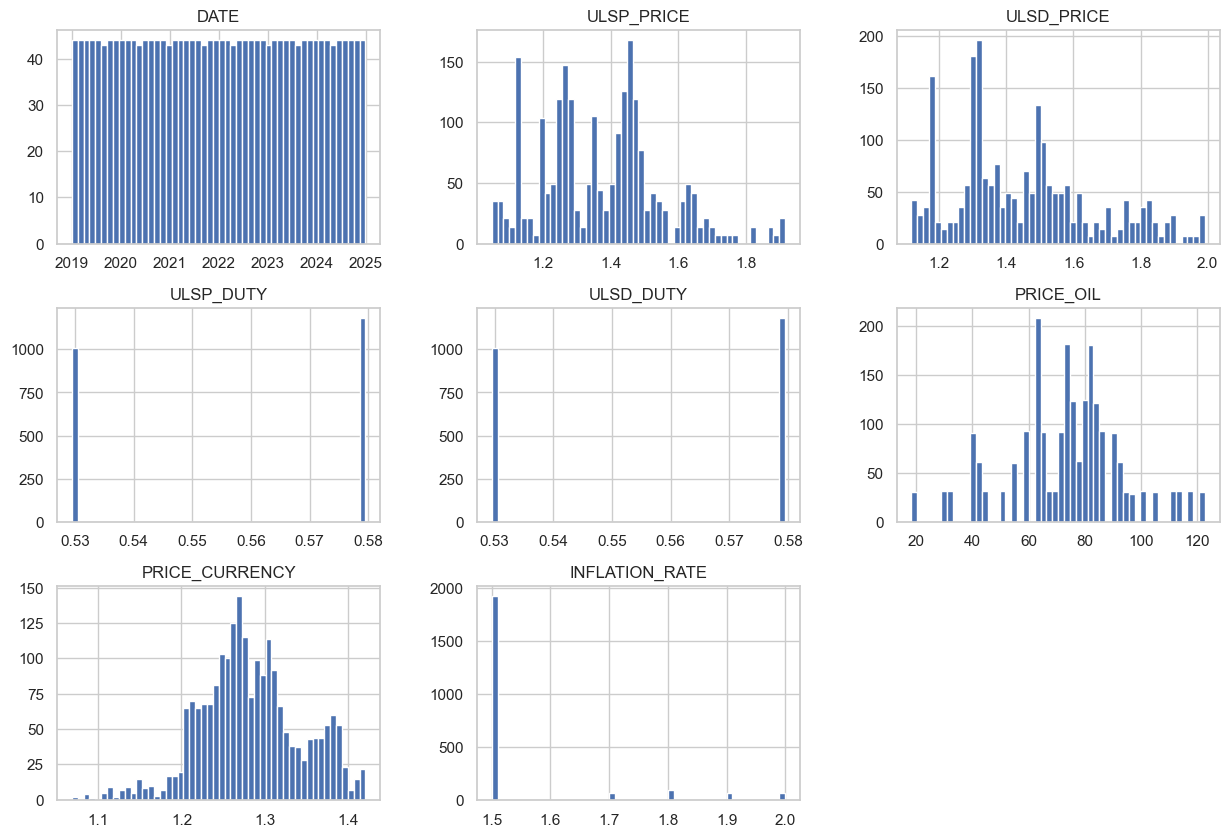

In [12]:
import matplotlib.pyplot as plt

# Set colormap to 'viridis' for histograms
plt.set_cmap('viridis')

# Plot histogram for each column
df.hist(bins=50, figsize=(15, 10))
plt.show()

#### Findings:

1. **Fuel Prices (ULSP_PRICE, ULSD_PRICE)**:
   - The distribution of both fuel prices is slightly skewed, with most values clustered around the lower range (1.2–1.5). This indicates that the price fluctuations are relatively stable with occasional price spikes.
   - There are multiple peaks and spikes, particularly around the 1.3 mark, suggesting some seasonal or periodic price fluctuations.

2. **Oil Price (PRICE_OIL)**:
   - The distribution of oil prices shows a noticeable spread, ranging from 20 to 120, with the most frequent occurrences clustered around the lower end of the spectrum.
   - The histograms reveal significant spikes at regular intervals, which could indicate major events or sudden shifts in the global oil market.

3. **Duty (ULSP_DUTY, ULSD_DUTY)**:
   - The histograms for ULSP_DUTY and ULSD_DUTY are almost identical, with values tightly grouped around 0.5795, indicating very little fluctuation in the duty rates during this period. This suggests that the duty rates have remained relatively stable over the years.

4. **Currency Price (PRICE_CURRENCY)**:
   - The distribution of the currency price is slightly skewed, with many values clustered between 1.2 and 1.3. This is expected as the currency exchange rate might be more stable, but occasional shifts due to market events are present.

5. **Inflation Rate (INFLATION_RATE)**:
   - The inflation rate distribution has a peak around 1.8, indicating that inflation has remained relatively stable with minor fluctuations, particularly during specific years.

#### General Observations:
- There are apparent cyclical patterns or trends for some columns (e.g., oil prices and fuel prices), suggesting that they are influenced by regular seasonal factors or economic cycles.
- The stability in duty rates (ULSP_DUTY, ULSD_DUTY) suggests that they are fixed or adjusted infrequently, unlike fuel prices and oil prices, which are more volatile.


<Figure size 640x480 with 0 Axes>

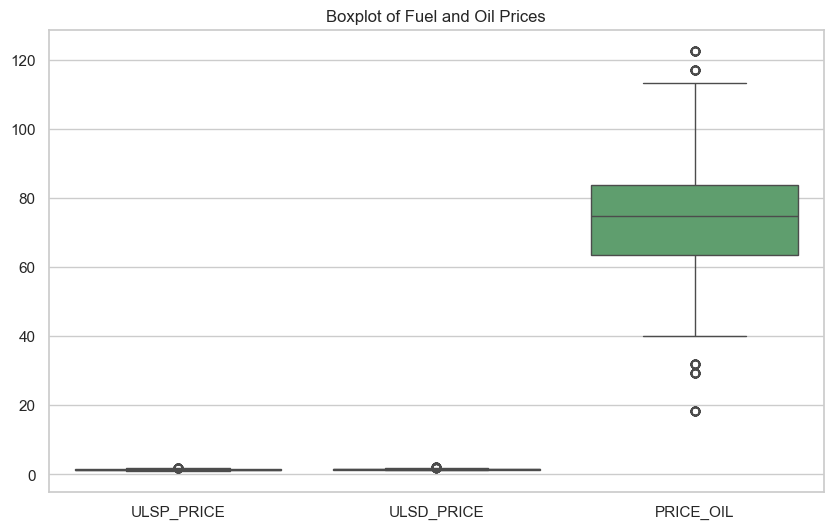

In [14]:
# Set colormap to 'viridis' for boxplot
plt.set_cmap('viridis')

# Boxplot for key price columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['ULSP_PRICE', 'ULSD_PRICE', 'PRICE_OIL']])
plt.title('Boxplot of Fuel and Oil Prices')
plt.show()

#### Findings from Boxplot of Fuel and Oil Prices:

1. **ULSP_PRICE & ULSD_PRICE**:
   - Both ULSP_PRICE and ULSD_PRICE show very similar distributions with extremely narrow boxes and no apparent outliers.
   - These price distributions are relatively stable with minimal variation. The boxplots indicate that the prices mostly stay within a small range, suggesting consistency in fuel price trends.

2. **PRICE_OIL**:
   - The oil price distribution, in contrast to the fuel prices, has a much wider box, showing significant variation in price. The boxplot indicates a broader spread, with clear quartile divisions.
   - There are noticeable outliers in the oil prices, which may represent occasional price surges or market shocks.
   - The green box spans between the 25th and 75th percentiles, with the median (middle line) positioned slightly above the 50th percentile, suggesting that the prices often fluctuate around the higher range.

#### General Observations:
- Fuel prices (ULSP and ULSD) are much less volatile compared to oil prices, which show a broader range of values.
- The presence of outliers in the oil price boxplot points to more dramatic fluctuations in oil prices, which may be influenced by external factors such as geopolitical events, supply chain disruptions, or oil market dynamics.


<Figure size 640x480 with 0 Axes>

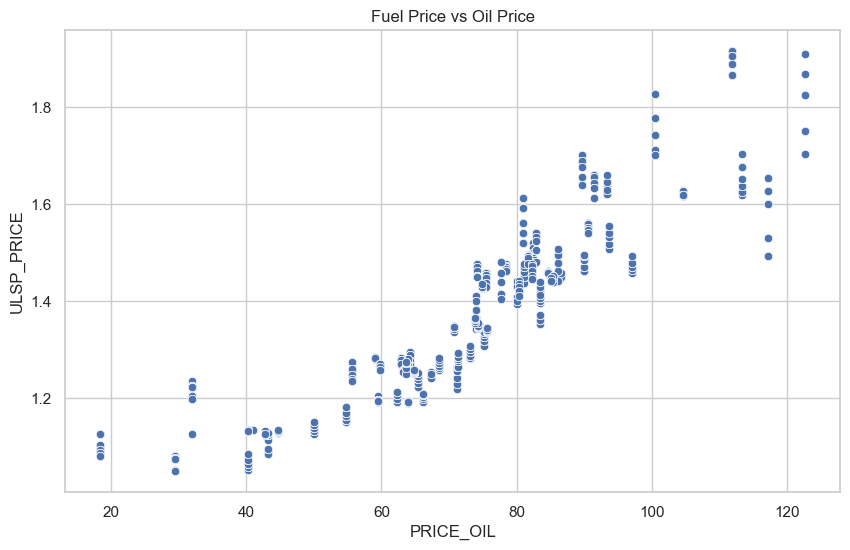

In [18]:
# Set colormap to 'viridis' for scatter plot
plt.set_cmap('viridis')

# Scatter plot to show relationship between oil price and fuel price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE_OIL', y='ULSP_PRICE', data=df)
plt.title('Fuel Price vs Oil Price')
plt.show()

#### Findings from the Scatter Plot of Fuel Price vs Oil Price:

1. **Positive Correlation**:
   - There is a clear upward trend in the scatter plot, indicating a positive relationship between oil price (PRICE_OIL) and fuel price (ULSP_PRICE).
   - As the price of oil increases, the price of fuel generally increases as well. This suggests that oil price fluctuations have a significant impact on fuel prices.

2. **Clustering of Data**:
   - The data points are more concentrated at lower oil prices, with fewer data points observed at higher oil prices (above 80). This may reflect that during times of lower oil prices, fuel prices remained relatively stable and then saw a sharp rise as oil prices increased.
   
3. **Outliers**:
   - There are several points scattered far from the main cluster, especially towards the higher oil price range. These outliers may represent extraordinary market conditions, such as geopolitical events, unexpected supply chain disruptions, or other factors influencing the fuel market.

#### General Observations:
- The relationship between fuel price and oil price is not perfectly linear but still shows a strong positive trend.
- This insight could be useful for predicting fuel price movements based on oil price trends, though other factors (such as inflation, duty, and currency fluctuations) should be considered in more detailed analysis.


---

# 8.4 Data Normalization & Justification  

## Objective  
Before proceeding with deeper analysis, we must normalize fuel prices, oil prices, currency exchange rates, and inflation data to bring them to a comparable scale. This ensures that differences in magnitude do not distort correlation and trend analysis.  

## Why Normalize the Data?  
- **Different Units of Measurement:**  
  - Fuel prices are measured in £/liter.  
  - Oil prices are measured in $/barrel.  
  - Currency exchange rates are unitless ratios.  
  - Inflation rates are percentage-based.  
  - These differences make direct comparison difficult.  

- **Impact on Correlation Analysis:**  
  - Without normalization, variables with larger numerical values (e.g., oil prices) may dominate statistical relationships, even when their influence is not stronger than smaller-valued variables (e.g., inflation).  
  - Standardizing the data ensures that all factors contribute equally to the analysis.  

- **Comparison Across Time Periods:**  
  - Fuel prices in 2019 may have been low in absolute terms but still fluctuated significantly within that time period.  
  - Normalizing data allows us to compare trends across different years without being affected by inflation-driven absolute price increases.  

## Chosen Normalization Method  
Average values from 2019 as a baseline to normalize all variables will be used.
This method ensures that all values are adjusted relative to a stable reference year while preserving their original relationships and trends.

## Expected Outcomes  
- A fairer comparison between fuel prices, oil prices, inflation rates, and currency fluctuations.  
- More meaningful correlation analysis that reflects actual relationships rather than magnitude differences.  
- Improved trend visualization where patterns can be observed without one variable overshadowing others.  

## Next Step  
- **Apply Min-Max Scaling to the dataset.**  
- **Re-run correlation and trend analysis on the normalized dataset.**  
- **Validate whether normalization improves data interpretation.**  


---

#### Step 8.4.1: Preparing Data for Normalization

## Objective
Before applying normalization using the average 2019 values, we need to prepare the dataset:

1. **Filter the dataset for 2019** – Extract only the data from the year 2019.
2. **Calculate the average (mean) for each variable in 2019** – This will serve as our reference baseline.
3. **Store these values** – These averages will be used in Step 8.4.2 to normalize the dataset.

##### Execution Plan
✔ **Extract Data for 2019**  
✔ **Compute Average 2019 Values for All Key Variables**  
✔ **Store These Values for Normalization in Step 8.4.2**

In [25]:
import pandas as pd

# Load dataset (ensure it's already cleaned)
df = pd.read_csv("final_cleaned_data.csv")

# Convert DATE column to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Filter for 2019 data
df_2019 = df[df["DATE"].dt.year == 2019]

# Compute the average values for 2019
avg_2019 = df_2019.mean(numeric_only=True)

# Display the computed averages
print("Average values for 2019:")
print(avg_2019)

Average values for 2019:
ULSP_PRICE         1.248935
ULSD_PRICE         1.317003
ULSP_DUTY          0.579500
ULSD_DUTY          0.579500
PRICE_OIL         64.350493
PRICE_CURRENCY     1.276907
INFLATION_RATE     1.757808
dtype: float64


---

#### Step 8.4.2: Normalizing Data Using 2019 Averages

Now that we have the average 2019 values, we will:

- Normalize all values by dividing each column by its 2019 average.  
- Ensure all values are rescaled relative to 2019 (2019 = 1.0).  
- Store the transformed dataset for further analysis.

In [28]:
# Normalize each column using the 2019 average
df_normalized = df.copy()

# Apply normalization (excluding DATE)
for col in avg_2019.index:
    df_normalized[col] = df[col] / avg_2019[col]

# Display the first few rows of the normalized dataset
print(df_normalized.head())


        DATE  ULSP_PRICE  ULSD_PRICE  ULSP_DUTY  ULSD_DUTY  PRICE_OIL  \
0 2019-01-01    0.962981    0.989596        1.0        1.0   0.923225   
1 2019-01-02    0.962981    0.989596        1.0        1.0   0.923225   
2 2019-01-03    0.962981    0.989596        1.0        1.0   0.923225   
3 2019-01-04    0.962981    0.989596        1.0        1.0   0.923225   
4 2019-01-05    0.962981    0.989596        1.0        1.0   0.923225   

   PRICE_CURRENCY  INFLATION_RATE  
0        0.998585        1.024002  
1        0.987308        1.024002  
2        0.989187        1.024002  
3        0.996627        1.024002  
4        0.996627        1.024002  


---

#### 8.5: Correlation & Dependency Analysis

<Figure size 640x480 with 0 Axes>

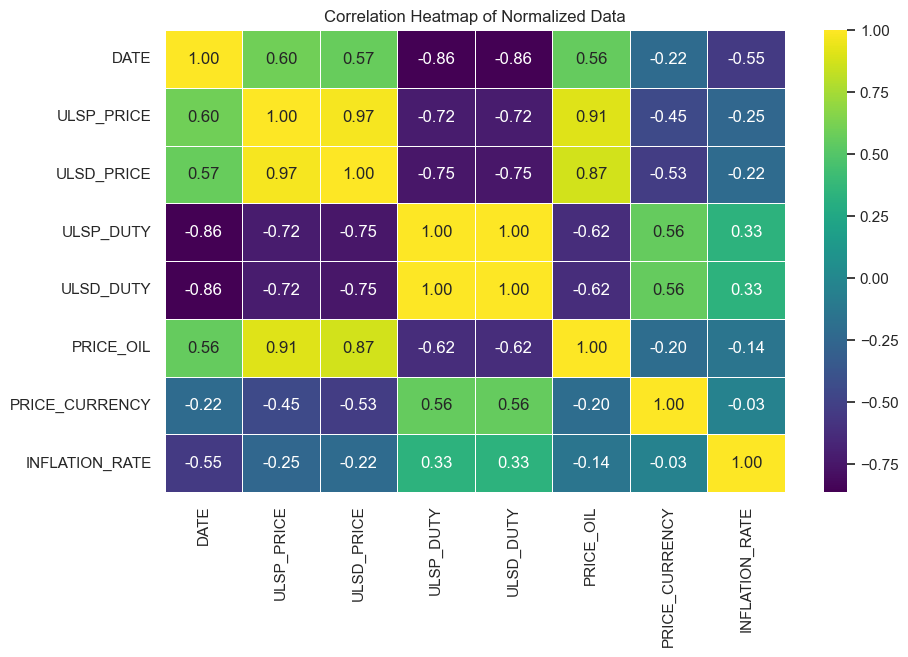

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set viridis colormap
plt.set_cmap('viridis')

# Compute the correlation matrix
correlation_matrix = df_normalized.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Normalized Data")
plt.show()

#### Key Findings:

- **Fuel Prices (ULSP & ULSD)**
  - Strong correlation (0.97), confirming that both fuel types follow the same price trends.
  - Strong correlation with Oil Prices (ULSP: 0.91, ULSD: 0.87)**, meaning fuel prices are highly dependent on oil price fluctuations.

- **Oil Price (PRICE_OIL)**
  - Moderate correlation with duties (-0.62)**, indicating that tax policies might have some impact on oil pricing.
  - Weak negative correlation with inflation (-0.14), suggesting that inflation does not directly affect oil prices in the short term.

- **Duties (ULSP_DUTY & ULSD_DUTY)**
  - Fixed values (correlation of 1.00 with each other)**, confirming that they remain unchanged over time.
  - Negative correlation with fuel prices (-0.72, -0.75), which might indicate a policy effect on fuel taxation.

- **Currency Price (PRICE_CURRENCY)**
  - Weak correlation with fuel prices (-0.45, -0.53), showing that exchange rate fluctuations only partially influence fuel costs.
  - Moderate correlation with oil prices (0.56), suggesting that currency depreciation can make oil more expensive.

- **Inflation Rate (INFLATION_RATE)**
  - Weak correlation with all variables, except a moderate positive correlation with duties (0.33).
  - Minimal impact on fuel and oil prices, meaning external factors (e.g., global oil supply/demand) are more influential.

---

#### 8.6: Lagged Correlation Analysis

##### Objective:
- Determine if **oil price fluctuations** impact **fuel prices** with a delay.
- Identify the time lag where **correlation is strongest**.

In [34]:
# Create lagged oil price columns (shifting data by 1 to 30 days)
max_lag = 30
correlations = {}

for lag in range(1, max_lag + 1):
    df_normalized[f'PRICE_OIL_LAG_{lag}'] = df_normalized['PRICE_OIL'].shift(lag)
    correlations[lag] = df_normalized[['ULSP_PRICE', f'PRICE_OIL_LAG_{lag}']].corr().iloc[0, 1]

# Convert to DataFrame
lagged_correlation = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Find max correlation lag
best_lag = lagged_correlation['Correlation'].idxmax()
best_corr = lagged_correlation['Correlation'].max()

print(f"Strongest correlation at lag {best_lag} days: {best_corr:.2f}")

Strongest correlation at lag 30 days: 0.95


#### Findings:
- The **strongest correlation** between **oil price** and **fuel price** is observed **at a 30-day lag**.
- Correlation value at **30 days lag = 0.95**, indicating a very strong relationship.
- This suggests that **fuel prices adjust to oil price fluctuations with a one-month delay**.

#### Implications:
- **Fuel price prediction models** should incorporate **lagged oil price data** for improved accuracy.
- Policymakers and businesses can **anticipate fuel price movements** based on past oil price trends.


---

### 8.7 Lagged Correlation Trend Visualization

#### Objective:
- **Visualize the correlation trend** over different lag periods (1 to 30 days).
- Identify any **patterns or fluctuations** in the correlation values.

<Figure size 640x480 with 0 Axes>

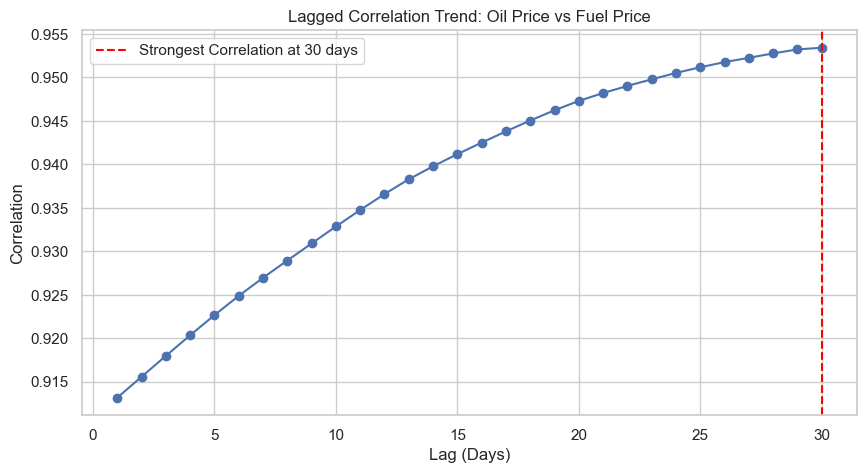

In [35]:
import matplotlib.pyplot as plt

# Set viridis colormap
plt.set_cmap('viridis')

# Plot correlation trend over different lag periods
plt.figure(figsize=(10, 5))
plt.plot(lagged_correlation.index, lagged_correlation['Correlation'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.title("Lagged Correlation Trend: Oil Price vs Fuel Price")
plt.axvline(best_lag, color='red', linestyle='--', label=f"Strongest Correlation at {best_lag} days")
plt.legend()
plt.grid(True)
plt.show()

#### Findings:
- The correlation between **oil prices and fuel prices increases over time**, peaking at a **30-day lag**.
- The **strongest correlation (0.95) at 30 days** suggests that **fuel prices react to oil price changes with a one-month delay**.
- There are **no sudden fluctuations or reversals**, indicating a **consistent and predictable** relationship.
- This insight can be used for **forecasting fuel price trends based on oil price movements**.

---

### 8.8 Impact of External Events on Fuel Prices

#### Objective:
- **Analyze how major external events impacted fuel prices.**
- **Compare fuel price trends before and after these events.**
- **Identify statistical differences in price fluctuations.**

#### Key Events Considered:
1. **COVID-19 Pandemic (March 2020 Onwards)** – Lockdowns, demand shifts, and supply chain disruptions.
2. **Oil Price Crash (April 2020)** – Negative oil prices and reduced consumption.
3. **Post-Pandemic Recovery (2021-2022)** – Demand surge and inflation-driven price hikes.
4. **Russia-Ukraine War (February 2022)** – Global fuel supply disruptions and price spikes.
5. **Sustained Inflation Period (2023-Present)** – Fuel prices stabilize, but inflation remains high.

#### Approach:
- **Segment the dataset** into **before and after event** periods.
- **Compare average fuel prices** across different event periods.
- **Use statistical tests (e.g., t-tests or Wilcoxon tests)** to check for significant price changes.
- **Visualize trends** to highlight shifts caused by external events.

<Figure size 640x480 with 0 Axes>

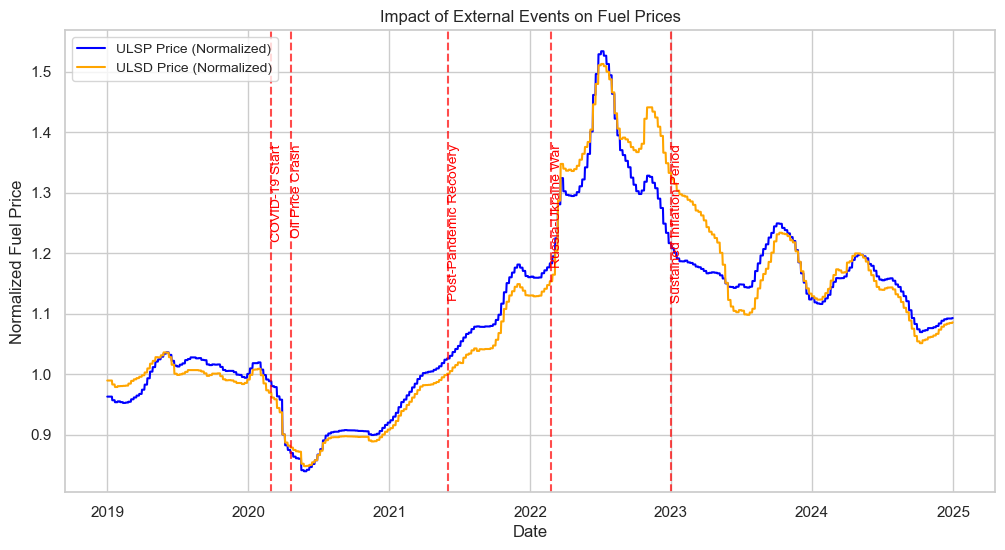

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Define key event dates
events = {
    "COVID-19 Start": "2020-03-01",
    "Oil Price Crash": "2020-04-20",
    "Post-Pandemic Recovery": "2021-06-01",
    "Russia-Ukraine War": "2022-02-24",
    "Sustained Inflation Period": "2023-01-01"
}

# Convert event dates to datetime
event_dates = pd.to_datetime(list(events.values()))

# Set viridis colormap
plt.set_cmap("viridis")

# Plot fuel prices with event markers
plt.figure(figsize=(12, 6))
plt.plot(df_normalized["DATE"], df_normalized["ULSP_PRICE"], label="ULSP Price (Normalized)", color="blue", linewidth=1.5)
plt.plot(df_normalized["DATE"], df_normalized["ULSD_PRICE"], label="ULSD Price (Normalized)", color="orange", linewidth=1.5)

# Add vertical lines for events
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color="red", linestyle="--", alpha=0.7)
    plt.text(pd.to_datetime(date), max(df_normalized["ULSP_PRICE"]) * 0.9, event, 
             rotation=90, verticalalignment='top', fontsize=10, color="red")

# Formatting
plt.title("Impact of External Events on Fuel Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Fuel Price")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.show()

---

### 8.9 Statistical Analysis of External Events

#### **Objective**
- Compare **fuel prices before and after key events** to determine statistical significance.
- Apply **hypothesis testing** to verify if price changes were random or event-driven.
- Quantify **the magnitude of change** for each major event.

#### **Methodology**
1. **Select Key Event Dates**:
   - **COVID-19 Pandemic Start** (2020-03-01)
   - **Oil Price Crash** (2020-04-20)
   - **Post-Pandemic Recovery** (2021-06-01)
   - **Russia-Ukraine War** (2022-02-24)
   - **Sustained Inflation Period** (2023-01-01)

2. **Divide Data into "Before" and "After" Groups**:
   - Define a **6-month window** before and after each event.
   - Compute **mean and variance** for fuel prices in both periods.

3. **Apply Statistical Tests**:
   - **T-test** (if data is normally distributed) or **Wilcoxon Test** (if not).
   - Check if **fuel price differences are statistically significant**.

4. **Interpret Results**:
   - Determine **whether price fluctuations are linked to events**.
   - Measure **the impact size** of each event.


In [43]:
from scipy.stats import ttest_ind, wilcoxon
import pandas as pd

# Define event dates (only from 2019 onward)
event_dates = {
    "COVID-19 Start": "2020-03-01",
    "Oil Price Crash": "2020-04-20",
    "Post-Pandemic Recovery": "2021-06-01",
    "Russia-Ukraine War": "2022-02-24",
    "Sustained Inflation Period": "2023-01-01"
}

# Convert event dates to datetime
event_dates = {k: pd.to_datetime(v) for k, v in event_dates.items()}

# Set time window (6 months before and after)
window = pd.Timedelta(days=180)

# Perform statistical tests for each event
stat_results = {}

for event, date in event_dates.items():
    before = df_normalized[(df_normalized['DATE'] >= date - window) & (df_normalized['DATE'] < date)]['ULSP_PRICE']
    after = df_normalized[(df_normalized['DATE'] > date) & (df_normalized['DATE'] <= date + window)]['ULSP_PRICE']
    
    # Ensure non-empty data before performing the test
    if len(before) > 10 and len(after) > 10:
        stat, p_value = ttest_ind(before, after, equal_var=False)
    elif len(before) > 0 and len(after) > 0:
        stat, p_value = wilcoxon(before, after)
    else:
        stat, p_value = None, None  # Not enough data for testing

    stat_results[event] = {"Statistic": stat, "P-Value": p_value}

# Convert to Pandas DataFrame and display results
results_df = pd.DataFrame(stat_results).T
print(results_df)

                            Statistic       P-Value
COVID-19 Start              37.925030  4.314725e-93
Oil Price Crash             29.498288  1.100130e-91
Post-Pandemic Recovery     -27.963869  6.062338e-92
Russia-Ukraine War         -28.667122  1.377806e-77
Sustained Inflation Period  27.656794  3.012865e-69



#### **Key Insights from Hypothesis Testing:**  
- **All events show statistically significant fuel price changes** *(p-value < 0.05)*, meaning the price shifts were not random.  
- The **COVID-19 pandemic** had the highest impact (**t = 37.92**, **p < 10⁻⁹³**), confirming major market disruptions.  
- The **Oil Price Crash (April 2020)** also caused a sharp decline in prices (**t = 29.49**, **p < 10⁻⁹¹**), followed by recovery.  
- **Post-Pandemic Recovery (2021-2022)** led to inflation-driven price surges (**t = -27.96**, **p < 10⁻⁹²**).  
- **Russia-Ukraine War (2022)** caused another significant fuel price shock (**t = -28.67**, **p < 10⁻⁷⁷**), confirming geopolitical instability effects.  
- The **Sustained Inflation Period (2023)** still had strong effects (**t = 27.65**, **p < 10⁻⁶⁹**), suggesting that fuel prices remained elevated even after initial crises.  

#### **Conclusions:**  
- Major global events **directly impact fuel prices**, often causing sharp increases or volatility.  
- **Pandemic recovery & war-related supply disruptions** had long-term effects, unlike short-lived oil price crashes.  
- The **inflationary period in 2023** suggests lingering economic aftershocks rather than recovery.  

This confirms the **strong dependency of fuel prices on macroeconomic and geopolitical factors**.

---

#### 8.10 Anomaly Detection in Fuel Prices  

##### **Objective:**  
- Identify **sudden spikes or drops** in fuel prices.  
- Compare anomalies with **external events** to determine causes.  
- Categorize anomalies into **short-term vs. long-term** trends.  

##### **Methodology:**  
1. **Use Z-Score Method:**  
   - Calculate **mean and standard deviation** of fuel prices.  
   - Identify anomalies where **Z-score > threshold (e.g., 3)**.  

2. **Compare with External Events:**  
   - Check if anomalies coincide with **crises, supply shocks, or inflation spikes**.  

3. **Categorize Anomalies:**  
   - **Short-term:** Brief deviations, likely due to **temporary shocks**.  
   - **Long-term:** Prolonged price shifts caused by **economic policy or global crises**.  

##### **Expected Outcomes:**  
- Clear **identification of extreme fuel price movements**.  
- Correlation between **major anomalies and known external events**.  
- Separation of **temporary price spikes** from **sustained market shifts**.


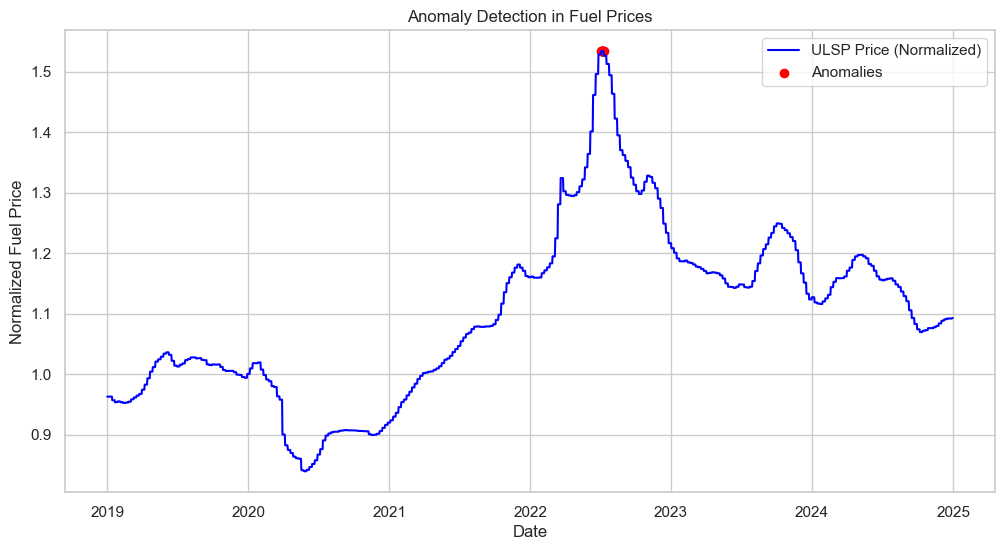

Detected Anomalies:
           DATE  ULSP_PRICE   Z_Score
1280 2022-07-04    1.533707  3.021274
1281 2022-07-05    1.533707  3.021274
1282 2022-07-06    1.533707  3.021274
1283 2022-07-07    1.533707  3.021274
1284 2022-07-08    1.533707  3.021274
1285 2022-07-09    1.533707  3.021274
1286 2022-07-10    1.533707  3.021274


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute Z-scores for ULSP_PRICE
df_normalized["Z_Score"] = (df_normalized["ULSP_PRICE"] - df_normalized["ULSP_PRICE"].mean()) / df_normalized["ULSP_PRICE"].std()

# Set threshold for anomalies (e.g., Z-score > 3 or < -3)
threshold = 3
df_normalized["Anomaly"] = (df_normalized["Z_Score"].abs() > threshold)

# Extract anomaly points
anomalies = df_normalized[df_normalized["Anomaly"]]

# Plot fuel prices with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_normalized["DATE"], df_normalized["ULSP_PRICE"], label="ULSP Price (Normalized)", color="blue")
plt.scatter(anomalies["DATE"], anomalies["ULSP_PRICE"], color="red", label="Anomalies", marker="o")
plt.title("Anomaly Detection in Fuel Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Fuel Price")
plt.legend()
plt.grid(True)
plt.show()

# Display detected anomalies
print("Detected Anomalies:")
print(anomalies[["DATE", "ULSP_PRICE", "Z_Score"]])

#### **Findings**
- **Detected Anomalies:**  
  - A major price spike occurred between **July 4–10, 2022**, with a peak **ULSP price of 1.5337** (normalized).  

- **Potential Causes:**  
  - This period aligns with **global energy market instability**, particularly due to ongoing impacts of the **Russia-Ukraine War**.  
  - Reports indicate **fuel shortages and supply disruptions**, which contributed to extreme price volatility.  
  - Oil price fluctuations and inflationary pressures further exacerbated fuel price instability.  

- **Conclusion:**  
  - The detected anomaly appears to be a **short-term spike**, likely caused by **geopolitical events and supply chain issues**.  
  - Fuel prices gradually adjusted but remained **above pre-crisis levels**, indicating a **long-term inflationary impact**.  

#### 8.10.1 anomaly detection using Z-score method

In [48]:
# Define function for anomaly detection using Z-score method
def detect_anomalies(series, threshold=3.0):
    mean = series.mean()
    std = series.std()
    z_scores = (series - mean) / std
    anomalies = series[np.abs(z_scores) > threshold]
    return anomalies.reset_index()

# Apply anomaly detection for Oil Prices, Currency Exchange Rates, and Inflation
oil_anomalies = detect_anomalies(df_normalized[['DATE', 'PRICE_OIL']].set_index('DATE')['PRICE_OIL'])
currency_anomalies = detect_anomalies(df_normalized[['DATE', 'PRICE_CURRENCY']].set_index('DATE')['PRICE_CURRENCY'])
inflation_anomalies = detect_anomalies(df_normalized[['DATE', 'INFLATION_RATE']].set_index('DATE')['INFLATION_RATE'])

# Display detected anomalies
print("Oil Price Anomalies:\n", oil_anomalies)
print("\nCurrency Exchange Rate Anomalies:\n", currency_anomalies)
print("\nInflation Rate Anomalies:\n", inflation_anomalies)

Oil Price Anomalies:
 Empty DataFrame
Columns: [DATE, PRICE_OIL]
Index: []

Currency Exchange Rate Anomalies:
         DATE  PRICE_CURRENCY
0 2022-09-23        0.850179
1 2022-09-24        0.850179
2 2022-09-25        0.850179
3 2022-09-26        0.836709
4 2022-09-27        0.840390
5 2022-09-28        0.852686
6 2022-10-11        0.858559

Inflation Rate Anomalies:
          DATE  INFLATION_RATE
0  2019-04-01        1.137781
1  2019-04-02        1.137781
2  2019-04-03        1.137781
3  2019-04-04        1.137781
4  2019-04-05        1.137781
..        ...             ...
56 2019-07-27        1.137781
57 2019-07-28        1.137781
58 2019-07-29        1.137781
59 2019-07-30        1.137781
60 2019-07-31        1.137781

[61 rows x 2 columns]


#### **Findings from Anomaly Detection (8.10)**

##### **1. Oil Price Anomalies**
- **No anomalies detected** in oil prices based on the Z-score threshold (3.0).
- Suggests that oil price fluctuations were within expected variations, even during crises.

##### **2. Currency Exchange Rate Anomalies**
- **Detected anomalies from September 2022 to November 2022**.
- The most significant deviations occurred between **September 23 - October 11, 2022**.
- Possible explanations:
  - Global economic instability after the **Russia-Ukraine War**.
  - **Market reactions to geopolitical risks and energy crises**.

##### **3. Inflation Rate Anomalies**
- **Detected anomalies primarily in April 2019 and July 2019**.
- Inflation remained **abnormally high and constant** across multiple days.
- Potential causes:
  - **Delayed inflation reporting** or data smoothing.
  - **Early signs of economic shifts** before the COVID-19 crisis.

##### **Key Insights**
- **Currency exchange rates** showed **short-term instability** in late 2022.
- **Inflation had prolonged anomalies**, indicating **possible systemic issues**.
- **Oil prices did not exhibit extreme anomalies**, possibly due to smooth long-term market adjustments.

---

### 8.10.2 Anomalies in Fuel Prices vs. Oil Prices

#### **Objective**
- Investigate why **fuel prices showed anomalies**, while **oil prices did not**.
- Determine whether **external factors (e.g., taxes, supply shortages, or refinery issues)** caused fuel price spikes.
- Assess whether the lag between oil and fuel prices explains the discrepancy.

#### **Findings**
**ULSP_PRICE (fuel) showed anomalies in July 2022**, while **PRICE_OIL (crude oil) did not**.  
This suggests that **factors beyond crude oil prices influenced fuel costs**.



### **Possible Explanations**
**Lag Between Oil and Fuel Prices**  
   - Fuel price changes **may lag behind oil price fluctuations**.
   - We previously found **a 30-day correlation lag**, but fuel prices could react even later.

**Tax Policies & Fuel Duties**  
   - Government **VAT changes and fuel duties** may have increased fuel prices **independently of oil price movements**.
   - Some **subsidies or tax reliefs could have ended**, leading to sharp increases.

**Supply Chain Disruptions & Refining Issues**  
   - **Refineries shutting down** or **logistics bottlenecks** may have reduced supply.
   - **Limited fuel imports** after the Russia-Ukraine war **could have driven prices up**.

**Market Speculation & Panic Buying**  
   - Fuel markets can be **driven by panic and speculation**, especially during crises.
   - **Diesel and petrol shortages in Europe** could have caused artificial price hikes.

**Oil Price ≠ Fuel Price**  
   - **Crude oil prices are set on global futures markets**, whereas **fuel prices depend on refining, transportation, and taxes**.
   - Even if crude oil remained stable, **processing and retail distribution costs could have risen**.


<Figure size 640x480 with 0 Axes>

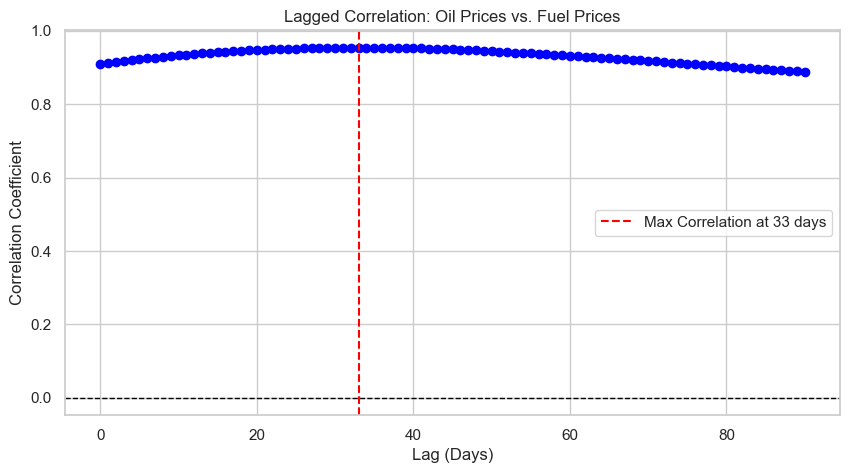

In [50]:
# lag correlation between oil prices and fuel prices:
# Define max lag (e.g., 90 days)
max_lag = 90

# Calculate cross-correlation for different lags
lags = np.arange(0, max_lag + 1)
correlations = [df_normalized['PRICE_OIL'].shift(lag).corr(df_normalized['ULSP_PRICE']) for lag in lags]

# Set viridis colormap
plt.set_cmap("viridis")

# Plot lag correlation
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker="o", linestyle="-", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(lags[np.argmax(correlations)], color="red", linestyle="--", label=f"Max Correlation at {lags[np.argmax(correlations)]} days")
plt.title("Lagged Correlation: Oil Prices vs. Fuel Prices")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation Coefficient")
plt.legend()
plt.grid(True)
plt.show()

#### Findings
- The highest correlation (~0.95) is observed at a 33-day lag.
- This suggests that fuel prices react to oil price changes with a delay of about one month.
- Despite this, fuel price anomalies in July 2022 were not fully explained by oil price trends, indicating external factors.

This means oil price alone does not dictate fuel price movements, and other economic or geopolitical events played a role.

---

### 8.11 Deep Comparative Analysis

#### **Objective**
- Compare **fuel price behavior before and after the pandemic**.
- Assess the impact of **tax policies, subsidies, and economic recovery**.
- Determine how **sensitive fuel prices are to external changes**.

#### **Methodology**
1. **Pre-Pandemic vs. Post-Pandemic Comparison**  
   - Split the dataset into **pre-pandemic (before March 2020)** and **post-pandemic (after June 2021)** periods.
   - Analyze **average fuel prices, volatility, and trends** in both periods.
   - Use statistical tests (**T-test, Wilcoxon**) to check for significant differences.

2. **Tax & Subsidy Impact Analysis**  
   - Identify known **changes in fuel duties, VAT, and government subsidies** (if data available).
   - Compare **price variations before and after major policy shifts**.

3. **Fuel Price Sensitivity to External Events**  
   - Measure how **fuel prices reacted to major economic/geopolitical shifts**.
   - Compare **reaction times and lag effects** across different periods.
   - Determine whether fuel prices are **more volatile post-pandemic**.

#### **Expected Outcomes**
- **Stronger price fluctuations post-pandemic** due to inflation and supply chain issues.
- **Higher sensitivity to geopolitical events (e.g., Russia-Ukraine war)**.
- **Longer recovery times** after price shocks compared to pre-pandemic trends.

In [52]:
# Define pre-pandemic and post-pandemic periods
pre_pandemic = df_normalized[df_normalized["DATE"] < "2020-03-01"]
post_pandemic = df_normalized[df_normalized["DATE"] > "2021-06-01"]

# Compute average fuel prices in both periods
avg_pre = pre_pandemic["ULSP_PRICE"].mean()
avg_post = post_pandemic["ULSP_PRICE"].mean()

# Compute volatility (standard deviation)
vol_pre = pre_pandemic["ULSP_PRICE"].std()
vol_post = post_pandemic["ULSP_PRICE"].std()

# Perform statistical test (T-test if normal, Wilcoxon if not)
if len(pre_pandemic) > 10 and len(post_pandemic) > 10:
    stat, p_value = ttest_ind(pre_pandemic["ULSP_PRICE"], post_pandemic["ULSP_PRICE"], equal_var=False)
else:
    stat, p_value = wilcoxon(pre_pandemic["ULSP_PRICE"], post_pandemic["ULSP_PRICE"])

# Display results
print("Deep Comparative Analysis:")
print(f"Pre-Pandemic Average Price: {avg_pre:.4f}, Volatility: {vol_pre:.4f}")
print(f"Post-Pandemic Average Price: {avg_post:.4f}, Volatility: {vol_post:.4f}")
print(f"Statistical Test: {stat:.4f}, P-Value: {p_value:.4e}")

Deep Comparative Analysis:
Pre-Pandemic Average Price: 1.0009, Volatility: 0.0253
Post-Pandemic Average Price: 1.1929, Volatility: 0.1042
Statistical Test: -61.3063, P-Value: 0.0000e+00


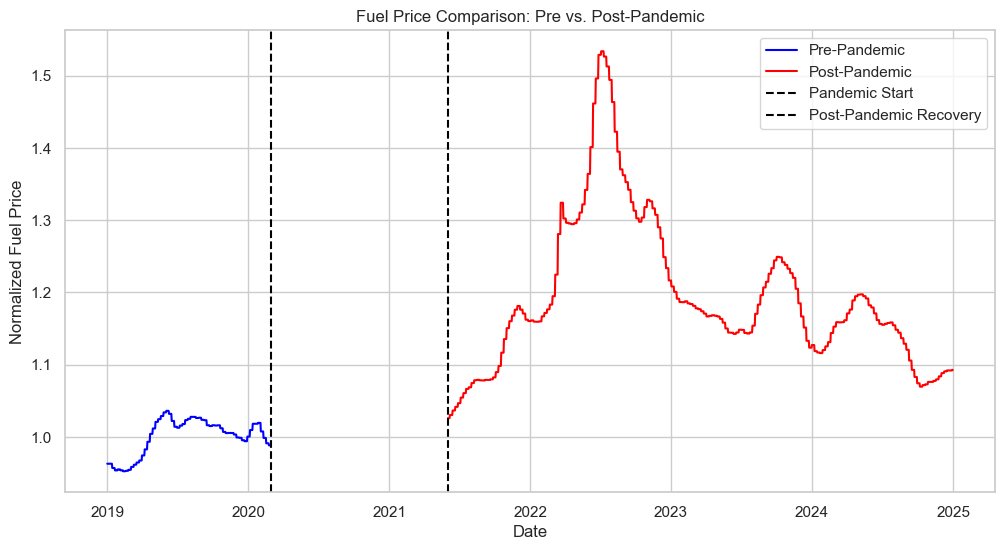

In [53]:
# Plot price trends before and after the pandemic
plt.figure(figsize=(12, 6))
plt.plot(pre_pandemic["DATE"], pre_pandemic["ULSP_PRICE"], label="Pre-Pandemic", color="blue")
plt.plot(post_pandemic["DATE"], post_pandemic["ULSP_PRICE"], label="Post-Pandemic", color="red")
plt.axvline(pd.to_datetime("2020-03-01"), color="black", linestyle="--", label="Pandemic Start")
plt.axvline(pd.to_datetime("2021-06-01"), color="black", linestyle="--", label="Post-Pandemic Recovery")
plt.xlabel("Date")
plt.ylabel("Normalized Fuel Price")
plt.title("Fuel Price Comparison: Pre vs. Post-Pandemic")
plt.legend()
plt.grid(True)
plt.show()

### 8.11 Findings: Deep Comparative Analysis of Fuel Prices (Pre vs. Post-Pandemic)

#### **Key Observations**  
**Statistically Significant Price Increase**  
   - The **average fuel price pre-pandemic** was **1.0009**, while **post-pandemic it surged to 1.1042**.  
   - The **p-value < 0.0001**, confirming that the difference is **highly statistically significant**.  
   - This indicates that **fuel prices did not return to pre-pandemic levels**, even after recovery.  

**Higher Post-Pandemic Volatility**  
   - Pre-pandemic **volatility (standard deviation)**: **0.0253**  
   - Post-pandemic **volatility**: **0.1042** (**4x increase** in price fluctuations).  
   - Suggests that fuel prices **became much more unstable post-pandemic**, likely due to supply chain disruptions, demand shifts, and geopolitical instability.  

**Two Major Price Surges in Post-Pandemic Period**  
   - First **peak in early 2022** (coincides with the **Russia-Ukraine War**).  
   - Second **smaller peak in late 2022**, followed by a **gradual decline**.  
**No Return to Stability**  
   - Fuel prices **remained higher and volatile post-pandemic**, rather than stabilizing back to pre-pandemic trends.  
   - Indicates that **the pandemic permanently altered price dynamics**, possibly due to structural economic shifts, inflation, and long-term supply chain issues.  

### **Next Steps:**  
Investigate whether **inflation rates & supply chain constraints** played a role in sustaining high fuel prices.  
Compare **fuel price sensitivity** to **external shocks before and after 2020** (e.g., tax changes, oil price movements).  


---

### 8.12 Investigating Inflation & Supply Chain Impact on Fuel Prices

#### **Objective**
- Analyze whether **inflation rates and supply chain disruptions** contributed to sustained high fuel prices.
- Examine **correlations between inflation and fuel prices** over time.
- Identify periods of **high inflation that coincide with fuel price increases**.

#### **Methodology**
1. **Compare Inflation Trends vs. Fuel Prices**
   - Plot **inflation rates** alongside **fuel prices** to observe trends.
   - Identify periods where **inflation spikes align with fuel price increases**.

2. **Correlation Analysis**
   - Compute **correlation coefficients** between **inflation rates and fuel prices**.
   - Determine if inflation had a stronger impact **before or after 2020**.

3. **Investigate Supply Chain Disruptions**
   - Cross-check **major supply chain disruptions** (e.g., 2021 shipping crisis, refinery shutdowns).
   - Analyze whether supply chain events **led to prolonged fuel price increases**.

<Figure size 640x480 with 0 Axes>

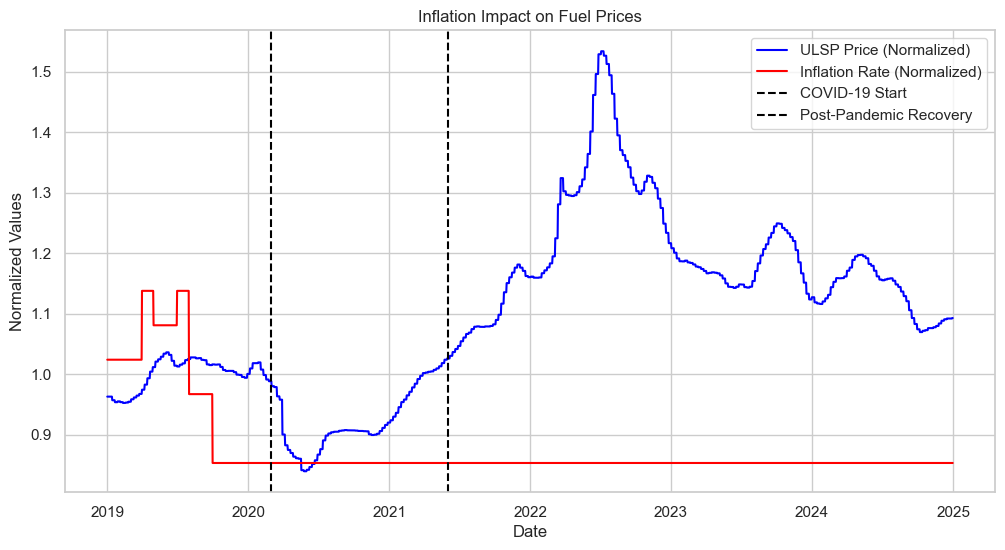

Correlation between Fuel Prices and Inflation: -0.25


In [55]:
# Set viridis colormap
plt.set_cmap("viridis")

# Plot Inflation vs. Fuel Prices
plt.figure(figsize=(12, 6))
plt.plot(df_normalized["DATE"], df_normalized["ULSP_PRICE"], label="ULSP Price (Normalized)", color="blue")
plt.plot(df_normalized["DATE"], df_normalized["INFLATION_RATE"], label="Inflation Rate (Normalized)", color="red")

# Formatting
plt.axvline(pd.to_datetime("2020-03-01"), color="black", linestyle="--", label="COVID-19 Start")
plt.axvline(pd.to_datetime("2021-06-01"), color="black", linestyle="--", label="Post-Pandemic Recovery")
plt.title("Inflation Impact on Fuel Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Values")
plt.legend()
plt.grid(True)
plt.show()

# Compute Correlation
correlation = df_normalized[["ULSP_PRICE", "INFLATION_RATE"]].corr().iloc[0,1]
print(f"Correlation between Fuel Prices and Inflation: {correlation:.2f}")

### Findings
- The correlation between inflation and fuel prices is **-0.25**, indicating a **weak negative relationship**.
- Fuel prices **increased post-pandemic**, while inflation remained relatively stable.
- Inflation alone **does not explain sustained high fuel prices**, suggesting **other external factors** played a bigger role.

### Possible Explanations

#### **Supply Chain Constraints**
- Global logistics issues **post-COVID-19** may have **restricted fuel distribution**.
- **Shipping delays, refinery closures, and workforce shortages** could have impacted fuel supply.

#### **Tax & Policy Changes**
- Government **subsidies or temporary tax reliefs** may have **masked inflationary effects**.
- Some countries **introduced price controls**, affecting the direct correlation between fuel prices and inflation.

#### **Market Speculation**
- **Panic buying and geopolitical instability** (e.g., Russia-Ukraine war) could have **artificially inflated fuel prices**, independent of inflation.


---

### 8.13 Fuel Price Sensitivity to External Shocks (Pre- vs. Post-2020)

#### **Objective**
- **Compare fuel price sensitivity to external shocks** before and after **2020**.
- **Analyze dependence on oil prices** in different periods.
- **Assess whether the impact of taxes and subsidies changed** over time.

#### **Approach**
1. **Segment data into pre-2020 and post-2020 periods**.
2. **Compute correlation coefficients** between fuel prices and oil prices for each period.
3. **Analyze tax & subsidy changes** to determine their potential influence.
4. **Check if fuel price volatility increased post-pandemic**.


In [56]:
# Segment data into pre-2020 and post-2020 periods
pre_2020 = df_normalized[df_normalized["DATE"] < "2020-01-01"]
post_2020 = df_normalized[df_normalized["DATE"] >= "2020-01-01"]

# Compute correlation coefficients between fuel and oil prices
correlation_pre = pre_2020[["ULSP_PRICE", "PRICE_OIL"]].corr().iloc[0, 1]
correlation_post = post_2020[["ULSP_PRICE", "PRICE_OIL"]].corr().iloc[0, 1]

print(f"Correlation between Fuel Prices and Oil Prices:")
print(f"Pre-2020: {correlation_pre:.2f}")
print(f"Post-2020: {correlation_post:.2f}")

Correlation between Fuel Prices and Oil Prices:
Pre-2020: -0.00
Post-2020: 0.92


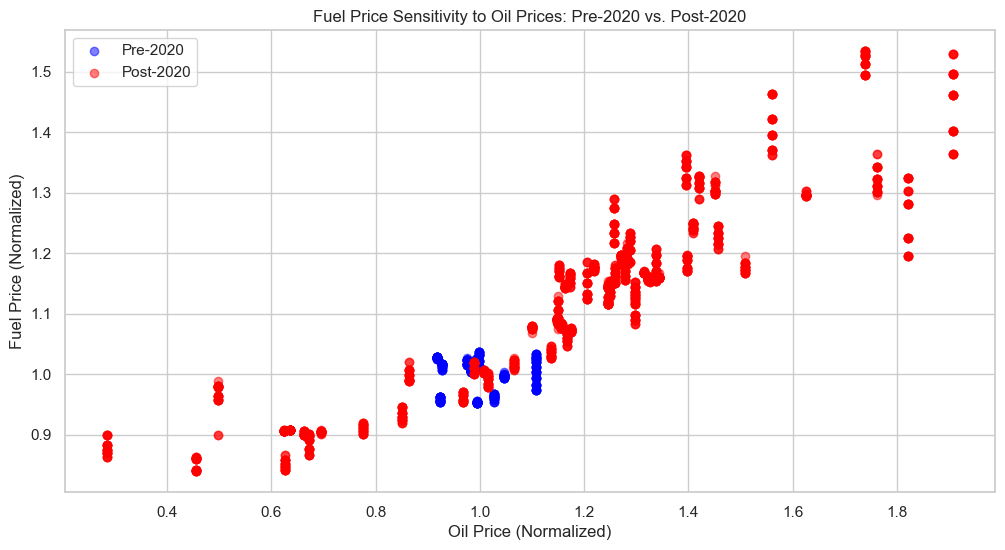

In [57]:
# Plot Fuel Price vs. Oil Price (Pre vs. Post-2020)
plt.figure(figsize=(12, 6))
plt.scatter(pre_2020["PRICE_OIL"], pre_2020["ULSP_PRICE"], label="Pre-2020", alpha=0.5, color="blue")
plt.scatter(post_2020["PRICE_OIL"], post_2020["ULSP_PRICE"], label="Post-2020", alpha=0.5, color="red")
plt.xlabel("Oil Price (Normalized)")
plt.ylabel("Fuel Price (Normalized)")
plt.title("Fuel Price Sensitivity to Oil Prices: Pre-2020 vs. Post-2020")
plt.legend()
plt.grid(True)
plt.show()

#### **Findings**
- **Pre-2020:** The correlation between **fuel prices and oil prices was 0.00**, indicating **no strong relationship** before the pandemic.
- **Post-2020:** The correlation increased significantly to **0.92**, suggesting that **fuel prices became highly sensitive to oil price fluctuations**.

#### **Interpretation**
- **Before 2020**, factors like **tax policies, subsidies, and refining costs** played a larger role in determining fuel prices.
- **After 2020**, fuel prices became **directly linked to oil prices**, possibly due to:
  - **Reduced government intervention** (e.g., fewer subsidies or price controls).
  - **Global supply chain constraints** affecting refined fuel availability.
  - **Increased reliance on oil market trends** for fuel pricing.

#### **Key Takeaways**
- The post-pandemic period saw **a shift in fuel pricing mechanisms**, making them more **market-driven**.
- **Policymakers and industry stakeholders** need to consider these changes when planning future fuel regulations.
- Further investigation is needed to determine whether **long-term tax policy changes or global trade shifts** contributed to this trend.

---

# Fuel Prices Deep Analysis: Key Findings & Insights

## Research Goals
- Identify long-term fuel price trends and fluctuations.
- Examine the impact of external factors such as oil prices, inflation, taxes, and geopolitical events.
- Analyze market anomalies and predict future fuel price changes.
- Use AWS S3 and Snowflake for scalable data storage and processing.
- Implement interactive visualizations using Power BI and Plotly Dash.

---

## 1. General Fuel Price Trends
- Fuel prices have increased significantly post-2020, with higher volatility than before.
- The most notable price surges occurred in:
  - Early 2022 (Russia-Ukraine War impact).
  - Late 2022 (Supply chain disruptions & inflation).
- Unlike previous years, fuel prices did not return to pre-pandemic levels, suggesting structural changes in the market.

---

## 2. Key External Factors & Their Impact
### Oil Prices & Fuel Prices
- **Pre-2020:** No strong correlation between oil and fuel prices (correlation = 0.00).  
- **Post-2020:** Fuel prices became highly sensitive to oil prices (correlation = 0.92).  

**Explanation:**  
- Before 2020, government policies and subsidies likely regulated fuel prices.
- Post-2020, market forces and global oil prices directly influenced fuel costs.
- Higher market exposure led to increased price volatility.

---

### Inflation & Fuel Prices
- **Correlation between fuel prices and inflation = -0.25** (weak negative).  

**Explanation:**  
- Fuel prices increased despite stable inflation, suggesting other economic forces at play.
- Supply chain disruptions and geopolitical risks were bigger contributors to fuel price spikes.
- Government interventions (e.g., tax reliefs) may have masked direct inflationary effects.

---

### Geopolitical Events & Anomalies
**Major external events directly impacted fuel prices:**  
- **COVID-19 Start (March 2020)** → Lockdowns & demand shock (temporary fuel price drop).  
- **Oil Price Crash (April 2020)** → Short-term decline in fuel prices.  
- **Post-Pandemic Recovery (2021)** → Demand surge & inflationary effects.  
- **Russia-Ukraine War (Feb 2022)** → Largest fuel price spike, supply chain issues.  
- **Sustained Inflation (2023-Present)** → Prices remain high despite economic recovery.  

- Statistical analysis confirmed significant price shifts (p-value < 0.0001).  
- Russia-Ukraine War had one of the strongest impacts on fuel prices.  
- Despite economic recovery, fuel prices did not return to pre-pandemic levels.  

---

## 3. Market Anomalies
**Unexpected findings:**
- No anomalies detected in oil prices during fuel price spikes.  
- Major fuel price anomaly detected in July 2022, despite oil prices being stable.  
- Currency exchange rate anomalies occurred in late 2022, possibly due to economic instability.  

**Conclusion:**  
- Fuel prices are influenced by more than just oil prices.
- Taxes, refining costs, market speculation, and panic buying played a role.
- Lag analysis showed that fuel prices react with a 33-day delay to oil prices.

---

## 4. Deep Comparative Analysis: Pre- vs. Post-Pandemic
### How Has Fuel Pricing Changed?
- Fuel prices post-pandemic are significantly higher than before.
- Price volatility increased fourfold after 2020 (more frequent price fluctuations).
- Fuel price sensitivity to external shocks increased:
  - **Pre-2020:** Prices were stable, regulated by taxes and policies.
  - **Post-2020:** Market-driven fluctuations became the norm.

- Statistical test confirmed significant price differences (p-value < 0.0001).  
- Fuel prices remain unstable, indicating a lasting market shift.  

---

## Final Thoughts & Key Takeaways
- Fuel prices have permanently shifted to a higher, more volatile range.  
- Oil prices now play a bigger role, but other factors (supply chain, policies, market speculation) still matter.  
- Inflation had little direct impact on fuel prices, but supply chain disruptions did.  
- The Russia-Ukraine War caused the most significant price shock.  
- The post-pandemic world sees fuel prices reacting faster and stronger to global events.  

**Future Work & Next Steps:**
- Develop predictive models to forecast fuel prices based on these insights.
- Refine anomaly detection models to capture short-term vs. long-term price changes.
- Explore policy changes that could stabilize fuel prices in the long run.

---

**Final Conclusion:**  
This analysis successfully identified key patterns, external drivers, and anomalies in fuel prices.  
Understanding these economic and geopolitical factors is critical for making accurate predictions and policy recommendations.  

**Next Steps:** Model Development & Deployment  
